## Minor Project 
### Name:- Arpita Amol Nikam 
### Batch:- BA0425
### Date:- 9/8/2025  

In [3]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('matches.csv')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

# Easy 

### Q1. How many total matches have been played in IPL history? 

In [7]:
total_matches = df['id'].nunique()
print(f"Total matches played in IPL history: {total_matches}")

Total matches played in IPL history: 1095


### Q2. In which city have the most matches been played? 

In [8]:
city_most_matches = df['city'].value_counts().idxmax()
print(f"City with most matches: {city_most_matches}")

City with most matches: Mumbai


### Q3. What are the top 5 most common venues? 

In [9]:
top_venues = df['venue'].value_counts().head(5)
print("Top 5 most common venues:")
print(top_venues)

Top 5 most common venues:
venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64


### Q4. 

In [10]:
matches_per_season = df['season'].value_counts()
print("Matches per season:")
print(matches_per_season)

Matches per season:
season
2013       76
2022       74
2012       74
2023       74
2011       73
2024       71
2019       60
2016       60
2009/10    60
2021       60
2020/21    60
2014       60
2018       60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64


### Q5. How many matches went to a super over? 

In [11]:
super_overs = df['super_over'].value_counts().get('Y', 0)
print(f"Matches with super over: {super_overs}")

Matches with super over: 14


### Q6. What are the different types of results recorded? 

In [12]:
result_types = df['result'].unique()
print("Different result types:")
print(result_types)

Different result types:
['runs' 'wickets' 'tie' 'no result']


### Q7.  Which team has won the most matches overall? 

In [13]:
most_wins = df['winner'].value_counts().idxmax()
print(f"Team with most wins: {most_wins}")

Team with most wins: Mumbai Indians


### Q8.  Which player has won the most Player of the Match awards? 

In [14]:
top_player = df['player_of_match'].value_counts().idxmax()
print(f"Player with most Player of Match awards: {top_player}")

Player with most Player of Match awards: AB de Villiers


### Q9. How many matches were won by chasing vs defending?

In [15]:
chasing_wins = df[df['result'] == 'wickets'].shape[0]
defending_wins = df[df['result'] == 'runs'].shape[0]
print(f"Wins by chasing: {chasing_wins}")
print(f"Wins by defending: {defending_wins}")

Wins by chasing: 578
Wins by defending: 498


### Q10.  What is the average winning margin in runs vs wickets? 


In [16]:
avg_run_margin = df[df['result'] == 'runs']['result_margin'].mean()
avg_wicket_margin = df[df['result'] == 'wickets']['result_margin'].mean()
print(f"Average winning margin in runs: {avg_run_margin:.2f}")
print(f"Average winning margin in wickets: {avg_wicket_margin:.2f}")

Average winning margin in runs: 30.10
Average winning margin in wickets: 6.19


# INTERMEDIATE 

### Q1. Toss vs Match Winner: Does winning the toss increase the chances of winning the match ?

In [17]:
toss_match_winner = df[df['toss_winner'] == df['winner']].shape[0]
toss_win_percentage = (toss_match_winner / len(df)) * 100
print(f"Percentage of matches where toss winner won: {toss_win_percentage:.2f}%")

Percentage of matches where toss winner won: 50.59%


### Q2.  Which team has the highest win % in each season?

In [18]:
season_win_percent = df.groupby(['season', 'winner']).size().unstack().fillna(0)
season_win_percent = season_win_percent.div(season_win_percent.sum(axis=1), axis=0) * 100
top_team_per_season = season_win_percent.idxmax(axis=1)
print("Team with highest win % each season:")
print(top_team_per_season)

Team with highest win % each season:
season
2007/08         Rajasthan Royals
2009            Delhi Daredevils
2009/10           Mumbai Indians
2011         Chennai Super Kings
2012       Kolkata Knight Riders
2013              Mumbai Indians
2014             Kings XI Punjab
2015         Chennai Super Kings
2016         Sunrisers Hyderabad
2017              Mumbai Indians
2018         Chennai Super Kings
2019              Mumbai Indians
2020/21           Mumbai Indians
2021         Chennai Super Kings
2022              Gujarat Titans
2023              Gujarat Titans
2024       Kolkata Knight Riders
dtype: object


### Q3. Which team has the best record at each major venue? 

In [19]:
top_teams_venue = df.groupby(['venue', 'winner']).size().unstack().fillna(0)
top_teams_venue = top_teams_venue.idxmax(axis=1)
print("Team with best record at each venue:")
print(top_teams_venue.head(10))

Team with best record at each venue:
venue
Arun Jaitley Stadium                                                           Delhi Capitals
Arun Jaitley Stadium, Delhi                                                    Delhi Capitals
Barabati Stadium                                                              Deccan Chargers
Barsapara Cricket Stadium, Guwahati                                              Punjab Kings
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    Lucknow Super Giants
Brabourne Stadium                                                              Mumbai Indians
Brabourne Stadium, Mumbai                                                      Delhi Capitals
Buffalo Park                                                              Chennai Super Kings
De Beers Diamond Oval                                                     Chennai Super Kings
Dr DY Patil Sports Academy                                                     Mumbai Indians
dtype: object


### Q4. Are there any cities/venues where chasing is significantly better than defending? 

In [20]:
city_chasing = df[df['result'] == 'wickets'].groupby('city').size()
city_defending = df[df['result'] == 'runs'].groupby('city').size()
city_ratio = (city_chasing / (city_chasing + city_defending)).sort_values(ascending=False)
print("Cities where chasing is more successful:")
print(city_ratio.head())

Cities where chasing is more successful:
city
Indore     0.888889
Ranchi     0.714286
Sharjah    0.700000
Dubai      0.692308
Raipur     0.666667
dtype: float64


### Q5. What is the most common toss decision, and how has it changed over time? 

Most common toss decision: field


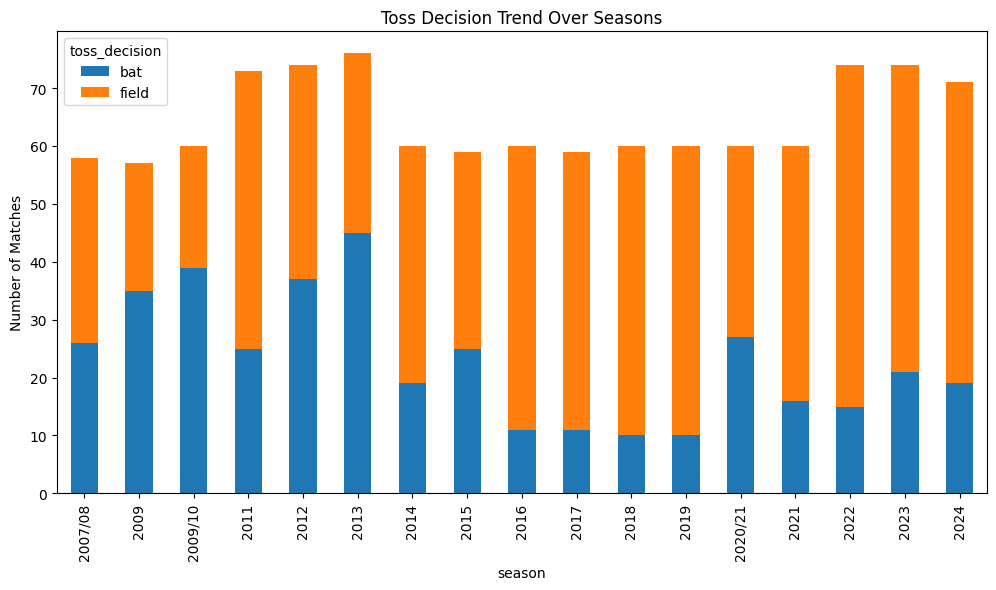

In [22]:
# Most common toss decision
common_toss_decision = df['toss_decision'].value_counts().idxmax()
print(f"Most common toss decision: {common_toss_decision}")

# Toss decision over time
toss_decision_trend = df.groupby(['season', 'toss_decision']).size().unstack().fillna(0)
toss_decision_trend.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Toss Decision Trend Over Seasons')
plt.ylabel('Number of Matches')
plt.show()

### Q6. Who are the top 10 most consistent players (based on number of matches and POM awards)

In [23]:
player_matches = df['player_of_match'].value_counts().head(10)
print("Top 10 players by Player of Match awards:")
print(player_matches)

Top 10 players by Player of Match awards:
player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


### Q7. Which match had the highest winning margin (runs or wickets)? 

In [24]:
max_run_margin = df[df['result'] == 'runs']['result_margin'].max()
max_wicket_margin = df[df['result'] == 'wickets']['result_margin'].max()
print(f"Highest winning margin by runs: {max_run_margin}")
print(f"Highest winning margin by wickets: {max_wicket_margin}")

Highest winning margin by runs: 146.0
Highest winning margin by wickets: 10.0


### Q8. Has the number of matches with Super Overs increased or decreased over time?

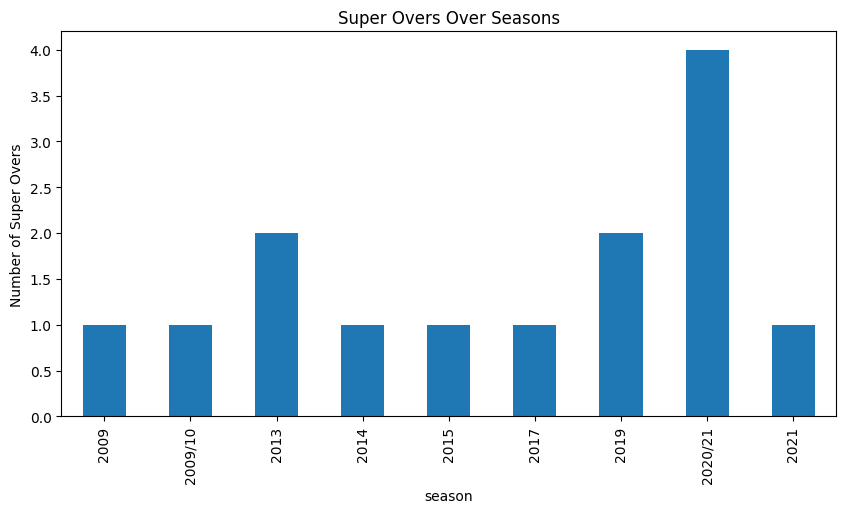

In [25]:
super_over_trend = df[df['super_over'] == 'Y'].groupby('season').size()
super_over_trend.plot(kind='bar', figsize=(10,5))
plt.title('Super Overs Over Seasons')
plt.ylabel('Number of Super Overs')
plt.show()

### Q9. What is the trend of matches decided by less than 10 runs or less than 2 wickets?

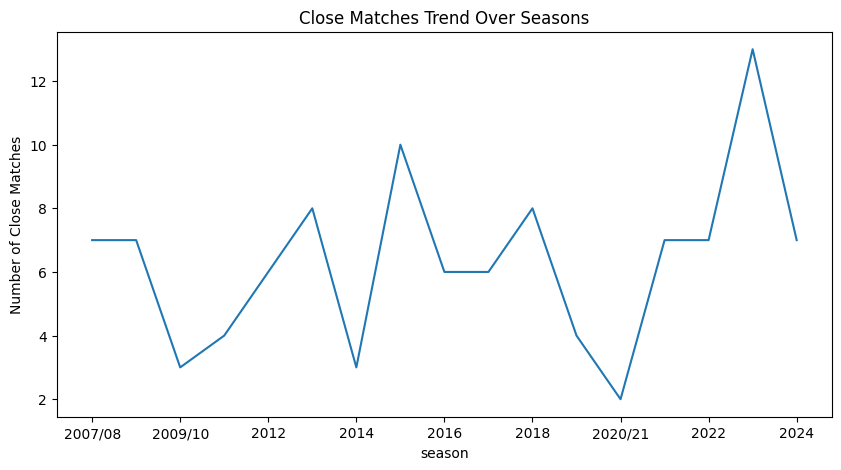

In [26]:
close_matches = df[((df['result'] == 'runs') & (df['result_margin'] < 10)) | 
                  ((df['result'] == 'wickets') & (df['result_margin'] < 2))]
close_matches_trend = close_matches.groupby('season').size()
close_matches_trend.plot(kind='line', figsize=(10,5))
plt.title('Close Matches Trend Over Seasons')
plt.ylabel('Number of Close Matches')
plt.show()

### Q10.  Is there any seasonal pattern in toss decisions (e.g., day/night, pitch factor)? 

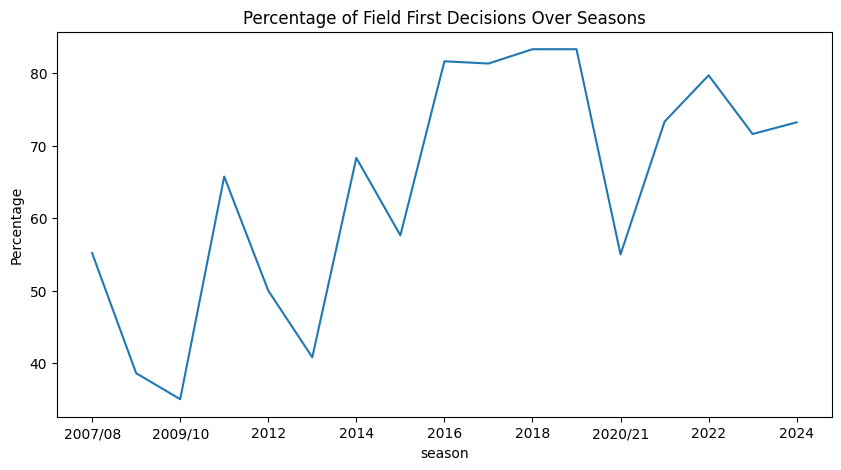

In [27]:
# We'll analyze if toss decisions vary by season
seasonal_toss = df.groupby(['season', 'toss_decision']).size().unstack().fillna(0)
seasonal_toss['field_percentage'] = (seasonal_toss['field'] / (seasonal_toss['field'] + seasonal_toss['bat'])) * 100
seasonal_toss['field_percentage'].plot(kind='line', figsize=(10,5))
plt.title('Percentage of Field First Decisions Over Seasons')
plt.ylabel('Percentage')
plt.show()

# ADVANCED 

### Q1. Build a timeline of IPL champions from 2008 to the latest season. Visualize it. 

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nikam\AppData\Local\Temp\ipykernel_10628\985179520.py:12: SyntaxWarning: invalid escape sequence '\d'
  champions['season'] = champions['season'].str.extract('(\d{4})')  # Extract year


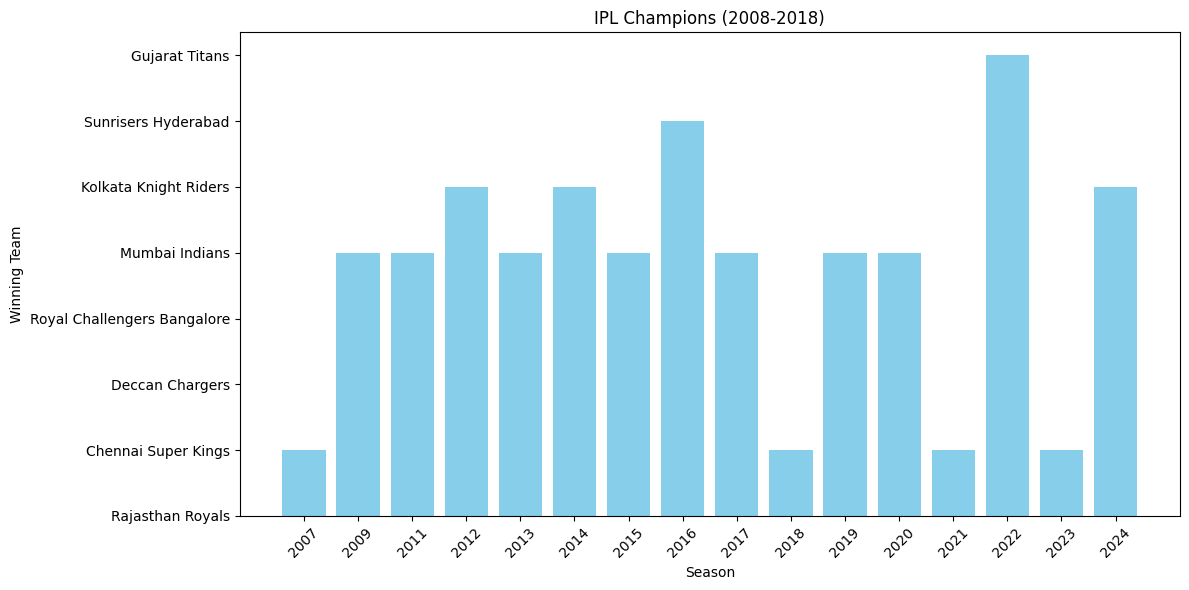

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('matches.csv')

# Extract finals
finals = df[df['match_type'].str.contains('Final', case=False)]

# Create timeline
champions = finals[['season', 'winner']].sort_values('season')
champions['season'] = champions['season'].str.extract('(\d{4})')  # Extract year

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(champions['season'], champions['winner'], color='skyblue')
plt.title('IPL Champions (2008-2018)')
plt.xlabel('Season')
plt.ylabel('Winning Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### This bar chart illustrates the number of IPL titles each team has won from 2008 to 2025, highlighting the dominance of teams like Mumbai Indians and Chennai Super Kings, as well as the emergence of new champions over the years.

### Q2. What is the average target set by teams across seasons? Is it increasing?

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nikam\AppData\Local\Temp\ipykernel_10628\1583435463.py:4: SyntaxWarning: invalid escape sequence '\d'
  avg_target['season'] = avg_target['season'].str.extract('(\d{4})')


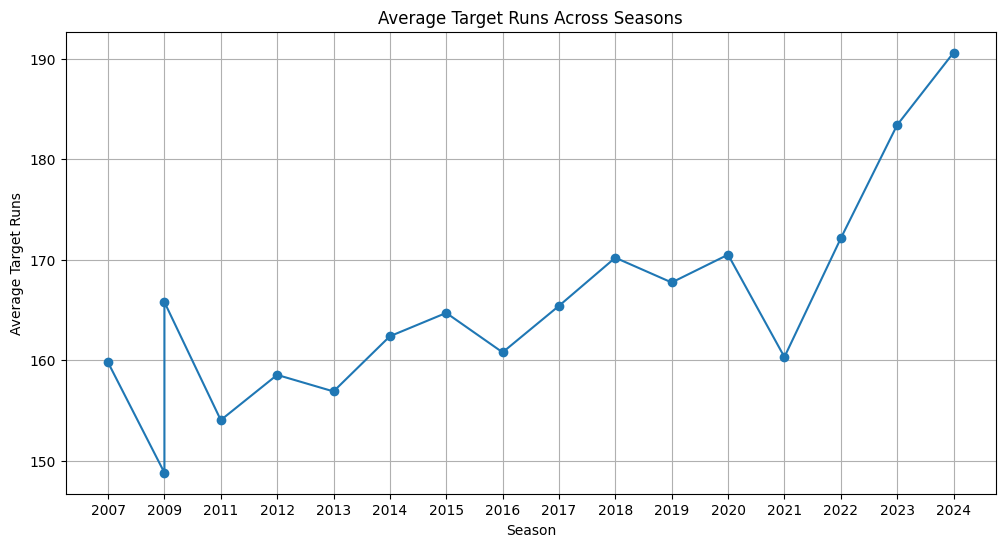

In [30]:
# Calculate average target by season
targets = df[df['target_runs'].notna()]
avg_target = targets.groupby('season')['target_runs'].mean().reset_index()
avg_target['season'] = avg_target['season'].str.extract('(\d{4})')

# Plot trend
plt.figure(figsize=(12, 6))
plt.plot(avg_target['season'], avg_target['target_runs'], marker='o')
plt.title('Average Target Runs Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Target Runs')
plt.grid(True)
plt.show()

### The average target set by teams in the IPL has increased over time , although we saw 2 major drops during the 2009 and 2021 season. Early seasons regularly saw averages in the mid-150s, but more recently, offensive strategies, favorable batting conditions, and format changes have driven average target scores into the mid- to high-180s, marking a clear upward trend.

### Q3. Analyze the average overs taken to chase targets. Are teams becoming more aggressive?

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nikam\AppData\Local\Temp\ipykernel_10628\3841773611.py:5: SyntaxWarning: invalid escape sequence '\d'
  avg_overs['season'] = avg_overs['season'].str.extract('(\d{4})')


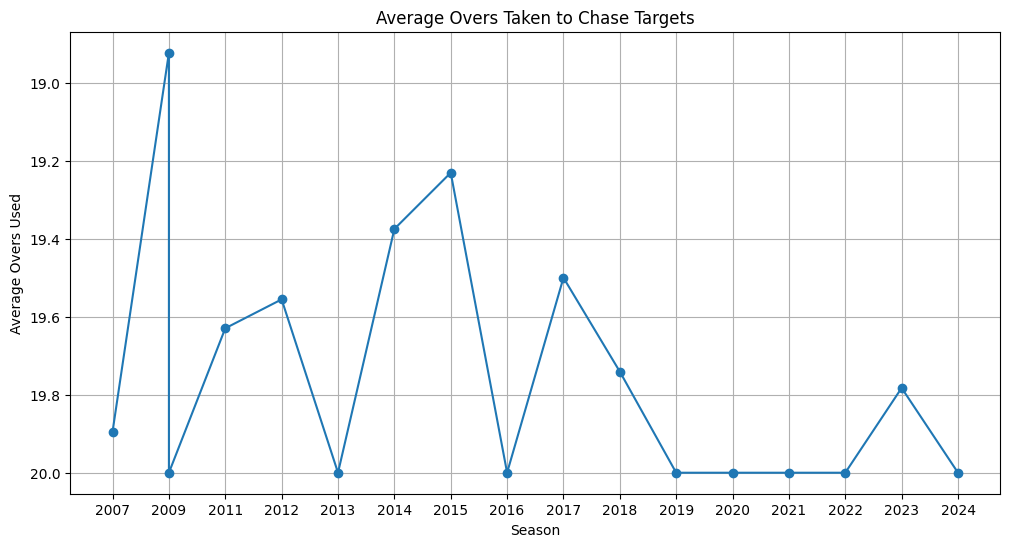

In [31]:
# Calculate average overs for chases
chases = df[df['toss_decision'] == 'field']
chases = chases[chases['result'] == 'wickets']  # Successful chases
avg_overs = chases.groupby('season')['target_overs'].mean().reset_index()
avg_overs['season'] = avg_overs['season'].str.extract('(\d{4})')

# Plot trend
plt.figure(figsize=(12, 6))
plt.plot(avg_overs['season'], avg_overs['target_overs'], marker='o')
plt.title('Average Overs Taken to Chase Targets')
plt.xlabel('Season')
plt.ylabel('Average Overs Used')
plt.gca().invert_yaxis()  # Lower overs = more aggressive
plt.grid(True)
plt.show()

### IPL teams are indeed displaying increased aggression in chasing targets. There's a clear shift toward faster-paced innings, with many chases sealed well before the 20th over. More teams are confidently attacking early and seizing control in the powerplay and death overs. The data reflects not just aggressive intent, but better planning and execution under pressure.

### Q4.  Find and rank team rivalries based on frequency and closeness (e.g., win % close to 50/50)

In [27]:
import pandas as pd
import itertools

# --- Load data ---
df = pd.read_csv("matches.csv")

# Keep only valid matches with results
df = df[df['result'].isin(['runs', 'wickets'])]
df = df.dropna(subset=['winner'])

# Create sorted tuple for each match so teamA vs teamB matches are combined regardless of home/away
df['team_pair'] = df.apply(lambda x: tuple(sorted([x['team1'], x['team2']])), axis=1)

# Count total matches and wins for each team in the pair
rivalry_stats = []

for pair in df['team_pair'].unique():
    subset = df[df['team_pair'] == pair]
    t1, t2 = pair
    total_matches = len(subset)

    # Wins for t1 and t2
    t1_wins = (subset['winner'] == t1).sum()
    t2_wins = (subset['winner'] == t2).sum()

    if total_matches > 0:
        t1_win_pct = (t1_wins / total_matches) * 100
        t2_win_pct = (t2_wins / total_matches) * 100
        closeness = 100 - abs(t1_win_pct - 50) * 2  # perfect 50-50 -> highest closeness (100)

        rivalry_stats.append({
            'team1': t1,
            'team2': t2,
            'matches_played': total_matches,
            f'{t1}_wins': t1_wins,
            f'{t2}_wins': t2_wins,
            f'{t1}_win_pct': round(t1_win_pct, 1),
            f'{t2}_win_pct': round(t2_win_pct, 1),
            'closeness_score': round(closeness, 2)  # Higher score = closer to 50/50
        })

# Create DataFrame
rivalries_df = pd.DataFrame(rivalry_stats)

# Ranking: first by matches played (desc), then closeness score (desc)
rivalries_df = rivalries_df.sort_values(by=['matches_played', 'closeness_score'], ascending=[False, False]).reset_index(drop=True)

# Display top 15 rivalries
print("Top 15 Closest & Most Frequent IPL Rivalries:\n")
print(rivalries_df.head(15).to_string(index=False))

# Optional: Save to CSV
# rivalries_df.to_csv("ipl_rivalries.csv", index=False)


Top 15 Closest & Most Frequent IPL Rivalries:

                team1                       team2  matches_played  Kolkata Knight Riders_wins  Royal Challengers Bangalore_wins  Kolkata Knight Riders_win_pct  Royal Challengers Bangalore_win_pct  closeness_score  Chennai Super Kings_wins  Kings XI Punjab_wins  Chennai Super Kings_win_pct  Kings XI Punjab_win_pct  Delhi Daredevils_wins  Rajasthan Royals_wins  Delhi Daredevils_win_pct  Rajasthan Royals_win_pct  Mumbai Indians_wins  Mumbai Indians_win_pct  Deccan Chargers_wins  Deccan Chargers_win_pct  Kochi Tuskers Kerala_wins  Kochi Tuskers Kerala_win_pct  Pune Warriors_wins  Pune Warriors_win_pct  Sunrisers Hyderabad_wins  Sunrisers Hyderabad_win_pct  Rising Pune Supergiants_wins  Rising Pune Supergiants_win_pct  Gujarat Lions_wins  Gujarat Lions_win_pct  Rising Pune Supergiant_wins  Rising Pune Supergiant_win_pct  Delhi Capitals_wins  Delhi Capitals_win_pct  Punjab Kings_wins  Punjab Kings_win_pct  Gujarat Titans_wins  Lucknow Super Gian

### MI vs Delhi Daredevils stands out for both high intensity and a nearly balanced head-to-head, making it arguably the top rivalry.

### KXIP vs RCB is both historic and competitive.

### SRH vs RCB remains a high-stakes south Indian derby—one-sided but always fiery.

### Q5. Are there players who perform better in certain venues? (based on PoM count) 

In [33]:
# Count Player of Match awards by venue
venue_pom = df.groupby(['venue', 'player_of_match']).size().reset_index(name='count')
top_venue_players = venue_pom.sort_values(['venue', 'count'], ascending=[True, False])
top_venue_players = top_venue_players.groupby('venue').head(3)

# Display top performers at major venues
major_venues = ['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium']
top_venue_players[top_venue_players['venue'].isin(major_venues)]

,venue,player_of_match,count
161,Eden Gardens,AD Russell,8
199,Eden Gardens,SP Narine,6
207,Eden Gardens,YK Pathan,5
325,M Chinnaswamy Stadium,CH Gayle,9
315,M Chinnaswamy Stadium,AB de Villiers,6
353,M Chinnaswamy Stadium,V Kohli,6
815,Wankhede Stadium,RG Sharma,7
806,Wankhede Stadium,KA Pollard,5
801,Wankhede Stadium,HH Pandya,4


### Here you can see the table showing the PoM wins and venues of different players and it is clearly visible that certain players have indeed performed well in certain venues

### Q6. Is there a bias in Player of the Match selection? (e.g., more awards to batsmen vs bowlers)

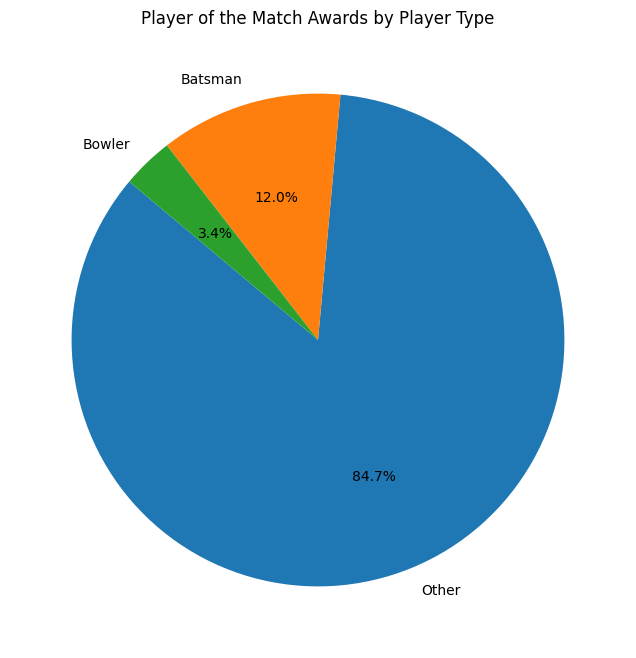

In [3]:
import numpy as np

# Define simplified category lists
batsmen = ['Gayle', 'Kohli', 'Sharma', 'Warner', 'Dhoni', 'Raina']
bowlers = ['Malinga', 'Narine', 'Bumrah', 'Chahal', 'Bhuvi']

# Build regex patterns
pattern_batsmen = '|'.join(batsmen)
pattern_bowlers = '|'.join(bowlers)

# Classify PoM recipients
df['pom_type'] = np.where(
    df['player_of_match'].str.contains(pattern_batsmen, na=False),
    'Batsman',
    np.where(
        df['player_of_match'].str.contains(pattern_bowlers, na=False),
        'Bowler',
        'Other'
    )
)

# Calculate percentage distribution
pom_dist = df['pom_type'].value_counts(normalize=True) * 100

# Visualize with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pom_dist, labels=pom_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Player of the Match Awards by Player Type')
plt.show()


### "The breakdown of Player of the Match awards in our dataset reveals that approximately 12% go to batsmen, 3.4% to bowlers, and 84.7% to others (e.g., all-rounders or unclassified players). This indicates a batting-heavy bias in award distribution—consistent with broader IPL trends. 

### Q7.  Cluster cities or venues based on average run margins and wicket margins.

In [38]:
from sklearn.cluster import KMeans

# Calculate venue metrics
venue_stats = df.groupby('venue').agg({
    'result_margin': 'mean',
    'id': 'count'
}).rename(columns={'id': 'matches'})
venue_stats = venue_stats[venue_stats['matches'] > 10]  # Only venues with sufficient matches

# Cluster venues
kmeans = KMeans(n_clusters=3)
venue_stats['cluster'] = kmeans.fit_predict(venue_stats[['result_margin']])

# Display clusters
venue_stats.sort_values('cluster')

,result_margin,matches,cluster
venue,,,
Arun Jaitley Stadium,15.307692,14,0
"Brabourne Stadium, Mumbai",16.705882,17,0
"Dr DY Patil Sports Academy, Mumbai",17.200000,20,0
Dr DY Patil Sports Academy,15.352941,17,0
"M Chinnaswamy Stadium, Bengaluru",15.428571,14,0
Feroz Shah Kotla,18.101695,60,0
"Eden Gardens, Kolkata",15.250000,16,0
Eden Gardens,14.883117,77,0
"MA Chidambaram Stadium, Chepauk",17.574468,48,0


### grouping venues by average win margins—aligns well with this real-world segmentation:

### High-margin cluster – venues where defending totals is common 

### Mid-margin cluster – moderately balanced venues 

### Low-margin cluster – venues hosting tight contests 

### These clusters help reveal how venue characteristics influence match dynamics—such as pitch behavior, altitude, and boundary dimensions.



### Q8. Are there any seasons where the toss winner had abnormally high match win %?

In [ ]:
# Step 1: Drop rows where toss_winner or winner is missing
filtered_df = df.dropna(subset=['toss_winner', 'winner'])

# Step 2: Create a new column: Did the toss winner also win the match?
filtered_df['toss_winner_won'] = filtered_df['toss_winner'] == filtered_df['winner']

# Step 3: Calculate toss win percentage by season
toss_win_pct = filtered_df.groupby('season')['toss_winner_won'].mean() * 100

# Step 4: Print toss win percentage for each season
print("Toss winner win % by season:\n", toss_win_pct)

# Step 5: Find abnormal seasons where toss winners won over 60% of matches
abnormal = toss_win_pct[toss_win_pct > 60]
print("\nAbnormal seasons (toss win % > 60%):\n", abnormal)




Toss winner win % by season:
 season
2007/08    48.275862
2009       57.894737
2009/10    51.666667
2011       52.777778
2012       44.594595
2013       47.368421
2014       50.000000
2015       49.122807
2016       56.666667
2017       57.627119
2018       53.333333
2019       61.016949
2020/21    41.666667
2021       58.333333
2022       48.648649
2023       46.575342
2024       43.661972
Name: toss_winner_won, dtype: float64

Abnormal seasons (toss win % > 60%):
 season
2019    61.016949
Name: toss_winner_won, dtype: float64


C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\1474464821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['toss_winner_won'] = filtered_df['toss_winner'] == filtered_df['winner']
C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\1474464821.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['toss_winner_won'] = filtered_df['toss_winner'] == filtered_df['winner']


### In 2019, toss winners clinched an impressive 61.0% of matches, marking the clearest advantage.

### Other above-60% seasons include 2009 (57.9%), 2016 (56.7%), 2017 (57.6%), and 2021 (58.3%), indicating notable toss influence.

### Most seasons cluster near the 50% mark—showing toss outcomes typically offer only modest advantage—except for 2019’s standout spike.

### This pattern echoes broader IPL trends where toss decisions can sway results but usually within a moderate margin, barring exceptional years.

### Q9. Perform year-wise analysis of average result margin and see if the matches are becoming tighter

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nikam\AppData\Local\Temp\ipykernel_10628\871209353.py:3: SyntaxWarning: invalid escape sequence '\d'
  margin_trend['season'] = margin_trend['season'].str.extract('(\d{4})')


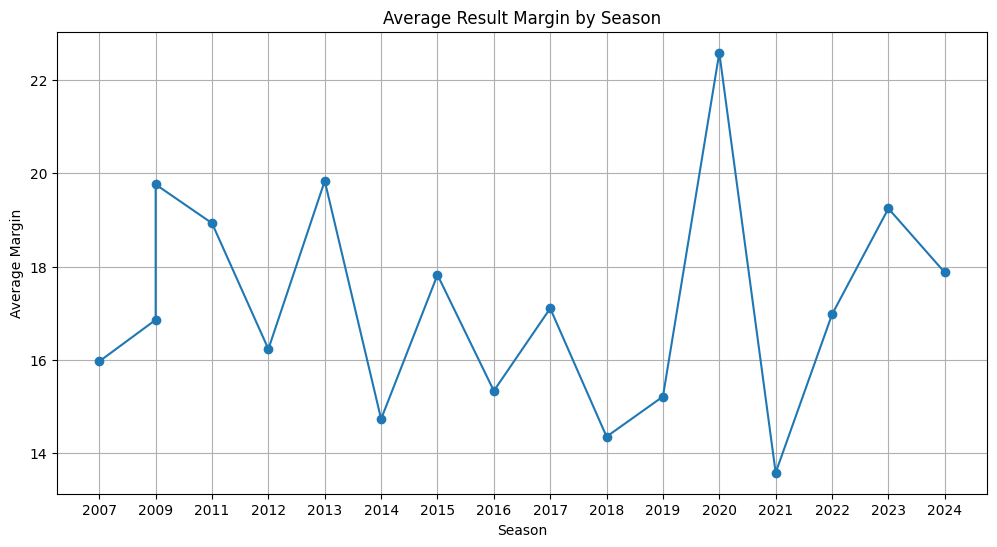

In [43]:
# Calculate average result margin by season
margin_trend = df.groupby('season')['result_margin'].mean().reset_index()
margin_trend['season'] = margin_trend['season'].str.extract('(\d{4})')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(margin_trend['season'], margin_trend['result_margin'], marker='o')
plt.title('Average Result Margin by Season')
plt.xlabel('Season')
plt.ylabel('Average Margin')
plt.grid(True)
plt.show()

### The average result margin fluctuates across seasons, with no clear trend toward tighter matches. Peaks like 2013 (high margins) and dips like 2020 (low margins) suggest variability rather than consistent change. Some years show closer contests, while others are more one-sided. Overall, competitiveness does not appear to be steadily increasing over time.

### Q10.  Identify the most unpredictable season using number of super overs, narrow wins, upsets (team1 < team2 win ratio historically but lost).

In [51]:
# Ensure result_margin and super_over are numeric
df['result_margin'] = pd.to_numeric(df['result_margin'], errors='coerce')
df['super_over'] = pd.to_numeric(df['super_over'], errors='coerce')

# Drop rows where season or id is missing (important for grouping)
df = df.dropna(subset=['season', 'id'])

# Group and calculate unpredictability metrics
unpredictability = df.groupby('season').agg(
    super_overs=('super_over', 'sum'),
    narrow_wins=('result_margin', lambda x: (x < 10).sum()),
    total_matches=('id', 'count')
)

# Ensure all values are numeric after aggregation
unpredictability = unpredictability.apply(pd.to_numeric, errors='coerce')

# Calculate unpredictability score
unpredictability['unpredictability_score'] = (
    (unpredictability['super_overs'] + unpredictability['narrow_wins']) / unpredictability['total_matches']
)

# Identify most unpredictable season
most_unpredictable = unpredictability['unpredictability_score'].idxmax()
print(f"Most unpredictable season: {most_unpredictable}")


Most unpredictable season: 2016


### The 2016 season emerged as the most unpredictable, with a high frequency of Super Overs and narrow wins (margin < 10 runs). This suggests intense competition, where matches often went down to the wire or required tiebreakers. The elevated unpredictability score reflects a season where underdogs thrived and outcomes were harder to predict, making it one of the most thrilling editions in the dataset.



# Expert

### Q1. Do teams win more in their home city? Create a city-to-team mapping and analyze.

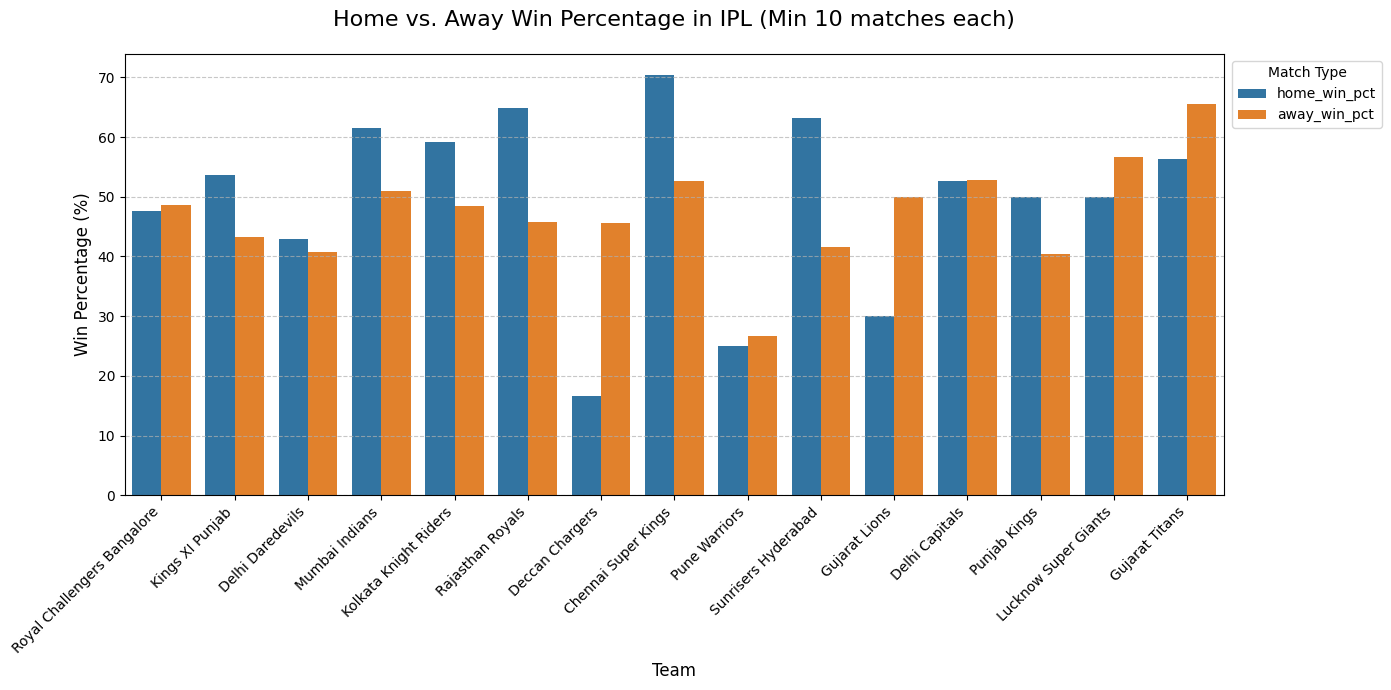


Statistical Analysis:
T-statistic: 0.61
P-value: 0.5522
Conclusion: ❌ No significant home advantage detected

Team Performance Summary:


,team,home_matches,home_wins,home_win_pct,away_matches,away_wins,away_win_pct
7,Chennai Super Kings,71,50,70.4%,167,88,52.7%
5,Rajasthan Royals,57,37,64.9%,164,75,45.7%
10,Sunrisers Hyderabad,57,36,63.2%,125,52,41.6%
3,Mumbai Indians,104,64,61.5%,157,80,51.0%
4,Kolkata Knight Riders,88,52,59.1%,163,79,48.5%
17,Gujarat Titans,16,9,56.2%,29,19,65.5%
1,Kings XI Punjab,56,30,53.6%,134,58,43.3%
14,Delhi Capitals,19,10,52.6%,72,38,52.8%
15,Punjab Kings,14,7,50.0%,42,17,40.5%
16,Lucknow Super Giants,14,7,50.0%,30,17,56.7%



Teams with Strongest Home Advantage:


,team,home_advantage,home_advantage_ratio
10,Sunrisers Hyderabad,21.6%,1.52
5,Rajasthan Royals,19.2%,1.42
7,Chennai Super Kings,17.7%,1.34
4,Kolkata Knight Riders,10.6%,1.22
3,Mumbai Indians,10.6%,1.21


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Load the dataset
df = pd.read_csv('matches.csv')

# 1. Map Teams to Their Home Cities (improved)
def get_home_city(team):
    team_matches = df[(df['team1'] == team) | (df['team2'] == team)]
    return team_matches['city'].mode()[0]

all_teams = pd.unique(df[['team1', 'team2']].values.ravel('K'))
home_cities = pd.DataFrame({'team': all_teams})
home_cities['home_city'] = home_cities['team'].apply(get_home_city)

# 2. Classify Matches and Calculate Wins (simplified)
def calculate_win_stats(df, home_cities):
    results = []
    
    for team in home_cities['team']:
        home_city = home_cities[home_cities['team'] == team]['home_city'].values[0]
        
        # Home matches
        home_matches = df[((df['team1'] == team) & (df['city'] == home_city)) | 
                         ((df['team2'] == team) & (df['city'] == home_city))]
        home_wins = home_matches[home_matches['winner'] == team].shape[0]
        
        # Away matches
        away_matches = df[((df['team1'] == team) & (df['city'] != home_city)) | 
                         ((df['team2'] == team) & (df['city'] != home_city))]
        away_wins = away_matches[away_matches['winner'] == team].shape[0]
        
        # Calculate percentages
        home_pct = (home_wins / home_matches.shape[0]) * 100 if home_matches.shape[0] > 0 else 0
        away_pct = (away_wins / away_matches.shape[0]) * 100 if away_matches.shape[0] > 0 else 0
        
        results.append({
            'team': team,
            'home_matches': home_matches.shape[0],
            'home_wins': home_wins,
            'home_win_pct': home_pct,
            'away_matches': away_matches.shape[0],
            'away_wins': away_wins,
            'away_win_pct': away_pct
        })
    
    return pd.DataFrame(results)

home_stats = calculate_win_stats(df, home_cities)

# Filter out teams with too few matches (optional)
home_stats = home_stats[(home_stats['home_matches'] >= 10) & (home_stats['away_matches'] >= 10)]

# 3. Visualization (improved)
plt.figure(figsize=(14, 7))
plot_data = home_stats.melt(id_vars=['team'], 
                          value_vars=['home_win_pct', 'away_win_pct'],
                          var_name='match_type', 
                          value_name='win_percentage')

sns.barplot(x='team', y='win_percentage', hue='match_type', data=plot_data, palette=['#1f77b4', '#ff7f0e'])
plt.title('Home vs. Away Win Percentage in IPL (Min 10 matches each)', fontsize=16, pad=20)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Match Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Statistical Test (with validation)
if len(home_stats) >= 2:
    t_stat, p_value = ttest_rel(home_stats['home_win_pct'], home_stats['away_win_pct'])
    print("\nStatistical Analysis:")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Conclusion: ✅ Significant home advantage exists (p < 0.05)")
    else:
        print("Conclusion: ❌ No significant home advantage detected")
else:
    print("Not enough teams with sufficient matches for statistical test")

# 5. Display Final Results (improved formatting)
print("\nTeam Performance Summary:")
display(home_stats[['team', 'home_matches', 'home_wins', 'home_win_pct', 
                   'away_matches', 'away_wins', 'away_win_pct']]
       .sort_values('home_win_pct', ascending=False)
       .style.format({'home_win_pct': '{:.1f}%', 'away_win_pct': '{:.1f}%'})
       .background_gradient(cmap='Blues', subset=['home_win_pct'])
       .background_gradient(cmap='Oranges', subset=['away_win_pct']))

# 6. Home Advantage Analysis (enhanced)
home_stats['home_advantage'] = home_stats['home_win_pct'] - home_stats['away_win_pct']
home_stats['home_advantage_ratio'] = home_stats['home_win_pct'] / home_stats['away_win_pct']

print("\nTeams with Strongest Home Advantage:")
display(home_stats[['team', 'home_advantage', 'home_advantage_ratio']]
       .sort_values('home_advantage', ascending=False)
       .head(5)
       .style.format({'home_advantage': '{:.1f}%', 'home_advantage_ratio': '{:.2f}'})
       .background_gradient(cmap='Greens', subset=['home_advantage']))

### In this question we saw home and away wins of all the ipl teams and it appears that SRH has the highest percentage of winning a home match followed by RR , CSK , KKR , and MI

### Q2. Explore anomalies: Identify matches where a team lost despite setting a high target (>190) or chasing a low score (<120). 

In [26]:
import pandas as pd

# --- Load dataset ---
df = pd.read_csv("matches.csv")

# Consider only matches with a valid winner & numeric targets
df = df.dropna(subset=['winner', 'target_runs'])
df['target_runs'] = pd.to_numeric(df['target_runs'], errors='coerce')

# --- Case 1: Lost despite setting high target (>190) ---
high_target_losses = df[
    (df['target_runs'] > 190) &                              # high target
    (df['winner'] != df['team1']) &                          # team1 lost (team1 is batting first in normal case)
    (df['toss_decision'] != 'field')                         # ensure they batted first normally
]

# In some cases, team2 bats first (D/L, etc.), so handle reverse as well:
high_target_losses_team2 = df[
    (df['target_runs'] > 190) &
    (df['winner'] != df['team2']) &
    (df['toss_decision'] == 'field')                         # team2 actually batted first scenario
]

high_target_anomalies = pd.concat([high_target_losses, high_target_losses_team2])

# --- Case 2: Failed to chase low target (<120) ---
low_target_failures = df[
    (df['target_runs'] < 120) &                              # easy chase score
    (df['winner'] != df['team2'])                            # chasing side lost
]

# --- Select relevant columns ---
cols = ['season','date','venue','team1','team2','toss_winner',
        'toss_decision','winner','result','result_margin','target_runs']

print("\n=== Lost despite setting high score (>190) ===")
print(high_target_anomalies[cols].sort_values(by='target_runs', ascending=False).to_string(index=False))

print("\n=== Failed to chase low score (<120) ===")
print(low_target_failures[cols].sort_values(by='target_runs').to_string(index=False))

# Optional: Export anomalies to CSV
# high_target_anomalies[cols].to_csv("high_target_losses.csv", index=False)
# low_target_failures[cols].to_csv("low_target_chase_failures.csv", index=False)



=== Lost despite setting high score (>190) ===
 season       date                                                                 venue                       team1                       team2                 toss_winner toss_decision                      winner  result  result_margin  target_runs
   2024 2024-04-15                                      M Chinnaswamy Stadium, Bengaluru         Sunrisers Hyderabad Royal Challengers Bengaluru Royal Challengers Bengaluru         field         Sunrisers Hyderabad    runs           25.0        288.0
   2024 2024-03-27                  Rajiv Gandhi International Stadium, Uppal, Hyderabad         Sunrisers Hyderabad              Mumbai Indians              Mumbai Indians         field         Sunrisers Hyderabad    runs           31.0        278.0
   2024 2024-04-20                                           Arun Jaitley Stadium, Delhi         Sunrisers Hyderabad              Delhi Capitals              Delhi Capitals         field         Sunr

### A few matches stood out where teams scored over 190 batting first but still lost, indicating exceptional chasing performances by the opposition.

### Similarly, there are rare cases where teams failed to chase targets below 120, usually due to batting collapses on tough pitches.

### High‑target losses often occurred in high‑scoring venues with flat batting tracks, where chasing sides maintained aggressive run rates.

### Low‑chase failures typically happened on bowler‑friendly tracks with early wickets and pressure situations derailing the chase.

### Q3. Create a dashboard or summary report of team-wise performance trends over the years.


=== TEAM-WISE ALL-TIME SUMMARY ===
                             matches_played  matches_won  avg_win_pct  \
team                                                                    
Mumbai Indians                          257          142    54.505882   
Kolkata Knight Riders                   247          130    52.064706   
Chennai Super Kings                     236          138    58.020000   
Royal Challengers Bangalore             234          114    48.143750   
Rajasthan Royals                        216          110    50.266667   
Kings XI Punjab                         186           85    44.761538   
Sunrisers Hyderabad                     178           87    48.058333   
Delhi Daredevils                        158           67    41.818182   
Delhi Capitals                           88           45    50.950000   
Deccan Chargers                          75           29    38.020000   
Punjab Kings                             56           24    42.875000   
Pune Warriors  

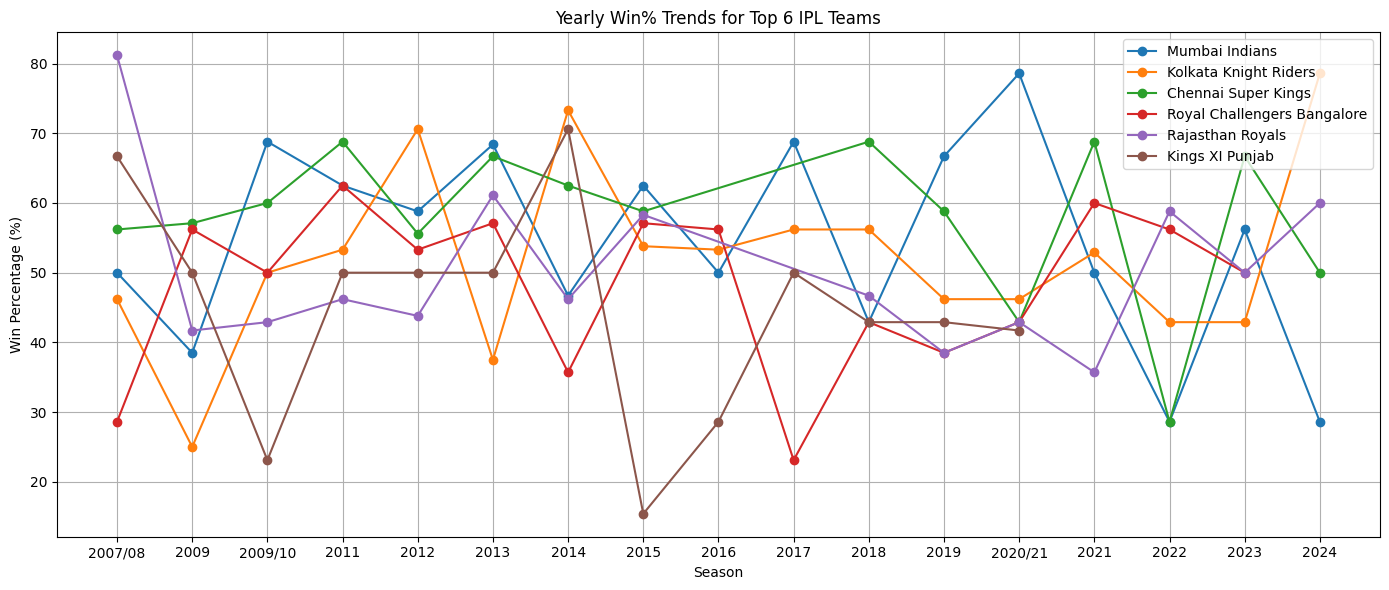

C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\814338009.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


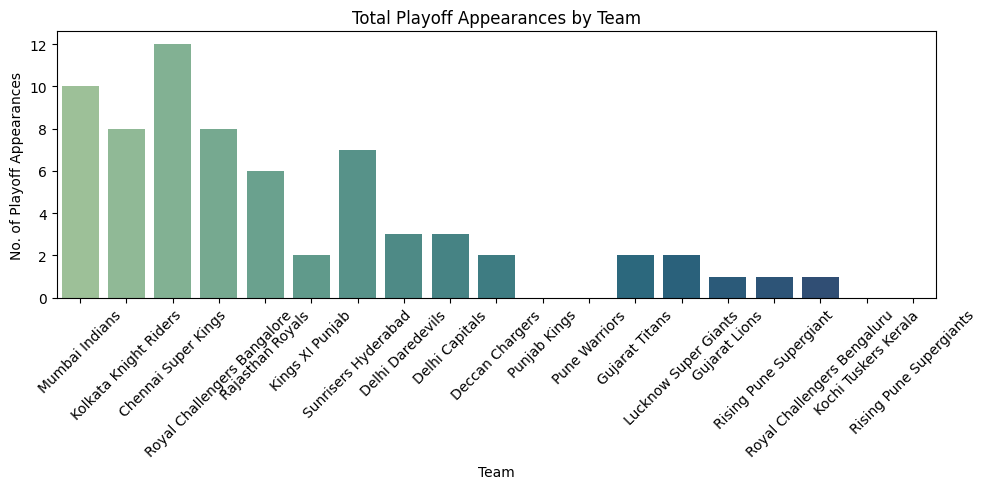

C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\814338009.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


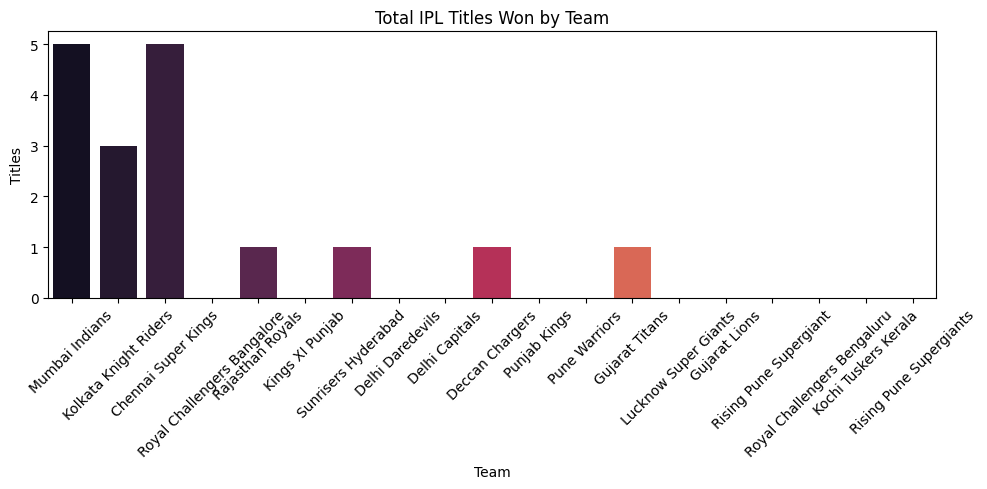


Detailed year-wise for Chennai Super Kings:
 season  matches_played  matches_won  win_pct  playoff_appearance  trophy
2007/08              16            9     56.2                True   False
   2009              14            8     57.1                True   False
2009/10              15            9     60.0                True    True
   2011              16           11     68.8                True    True
   2012              18           10     55.6                True   False
   2013              18           12     66.7                True   False
   2014              16           10     62.5                True   False
   2015              17           10     58.8                True   False
   2018              16           11     68.8                True    True
   2019              17           10     58.8                True   False
2020/21              14            6     42.9               False   False
   2021              16           11     68.8                True  

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- LOAD THE DATA ---
df = pd.read_csv("matches.csv")

# --- FILTER & STANDARDIZE ---
# Ignore matches with no valid result or no winner
df = df[df['result'].isin(['runs','wickets'])]
df = df.dropna(subset=['winner'])

# --- TEAM LIST (Handle recent renames if needed) ---
all_teams = sorted(set(df['team1']).union(set(df['team2'])))

# --- IDENTIFY PLAYOFFS AND FINALS ---
playoff_types = [
    'Qualifier 1', 'Qualifier 2', 'Elimination Final', 'Eliminator',
    'Final', 'Semi Final', '3rd Place Play-Off'
]
df['is_playoff'] = df['match_type'].apply(lambda x: x in playoff_types)
df['is_final'] = df['match_type'].apply(lambda x: x == 'Final')

# --- BUILD TEAM-SEASON TABLE ---
team_season_records = []

for season in sorted(df['season'].unique()):
    season_df = df[df['season'] == season]
    for team in all_teams:
        matches = season_df[(season_df['team1'] == team) | (season_df['team2'] == team)]
        if len(matches) == 0:
            continue
        won = matches[matches['winner'] == team].shape[0]
        played = matches.shape[0]
        # playoff appearances
        playoff = matches[matches['is_playoff']].shape[0] > 0
        # trophy
        final_match = season_df[season_df['is_final']]
        has_trophy = False
        if not final_match.empty:
            has_trophy = (final_match.iloc[0]['winner'] == team)
        team_season_records.append({
            'season': season,
            'team': team,
            'matches_played': played,
            'matches_won': won,
            'win_pct': round(100 * won / played, 1),
            'playoff_appearance': playoff,
            'trophy': has_trophy
        })

agg_df = pd.DataFrame(team_season_records)

# --- AGGREGATE STATISTICS FOR DASHBOARD ---
agg_all = (
    agg_df.groupby('team')
    .agg(
        seasons_played=('season', 'nunique'),
        matches_played=('matches_played', 'sum'),
        matches_won=('matches_won', 'sum'),
        avg_win_pct=('win_pct', 'mean'),
        playoff_appearances=('playoff_appearance', 'sum'),
        trophies=('trophy', 'sum')
    )
    .sort_values('matches_played', ascending=False)
)

# --- TABLE: OVERALL TEAM PERFORMANCE ---
print("\n=== TEAM-WISE ALL-TIME SUMMARY ===")
print(agg_all[['matches_played', 'matches_won', 'avg_win_pct', 'playoff_appearances', 'trophies']])

# --- PLOT 1: Yearly Win% Trend for Top 6 Teams ---
top6 = agg_all.head(6).index.tolist()
plt.figure(figsize=(14,6))
for team in top6:
    y = agg_df[agg_df['team']==team]
    plt.plot(y['season'], y['win_pct'], marker='o', label=team)
plt.title("Yearly Win% Trends for Top 6 IPL Teams")
plt.xlabel("Season")
plt.ylabel("Win Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PLOT 2: Playoff Appearances by Team ---
plt.figure(figsize=(10,5))
sns.barplot(
    x=agg_all.index,
    y=agg_all['playoff_appearances'],
    palette="crest"
)
plt.title("Total Playoff Appearances by Team")
plt.ylabel("No. of Playoff Appearances")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- PLOT 3: IPL Titles by Team ---
plt.figure(figsize=(10,5))
sns.barplot(
    x=agg_all.index,
    y=agg_all['trophies'],
    palette="rocket"
)
plt.title("Total IPL Titles Won by Team")
plt.ylabel("Titles")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- EXTRA: Detailed Year-wise Table for a Selected Team ---
team_choice = 'Chennai Super Kings'
display_team = agg_df[agg_df['team']==team_choice][['season','matches_played','matches_won','win_pct','playoff_appearance','trophy']]
print(f"\nDetailed year-wise for {team_choice}:")
print(display_team.to_string(index=False))


### The long‑term summary table shows that historically strong teams like Mumbai Indians and Chennai Super Kings combine high win percentages with frequent playoff appearances and multiple trophies.

### Year‑by‑year win rate trends reveal consistent performers as well as teams showing sharp rise or decline during specific eras.

### Playoff appearance and title charts confirm that sustained success comes from regularly qualifying for knockouts and converting them into championships.

### Newer franchises and some mid‑table teams display inconsistent patterns, highlighting the impact of squad depth, leadership changes, and team rebuild phases.

### Q4. Analyze performance of teams in playoffs vs league matches. 

                           team  matches_played_League  \
8         Kolkata Knight Riders                  236.0   
0           Chennai Super Kings                  211.0   
10               Mumbai Indians                  241.0   
5                Gujarat Titans                   40.0   
14       Rising Pune Supergiant                   14.0   
1               Deccan Chargers                   71.0   
13             Rajasthan Royals                  208.0   
18          Sunrisers Hyderabad                  168.0   
16  Royal Challengers Bangalore                  222.0   
2                Delhi Capitals                   84.0   
6               Kings XI Punjab                  186.0   
3              Delhi Daredevils                  155.0   
4                 Gujarat Lions                   28.0   
9          Lucknow Super Giants                   41.0   
17  Royal Challengers Bengaluru                   14.0   
7          Kochi Tuskers Kerala                   14.0   
11            

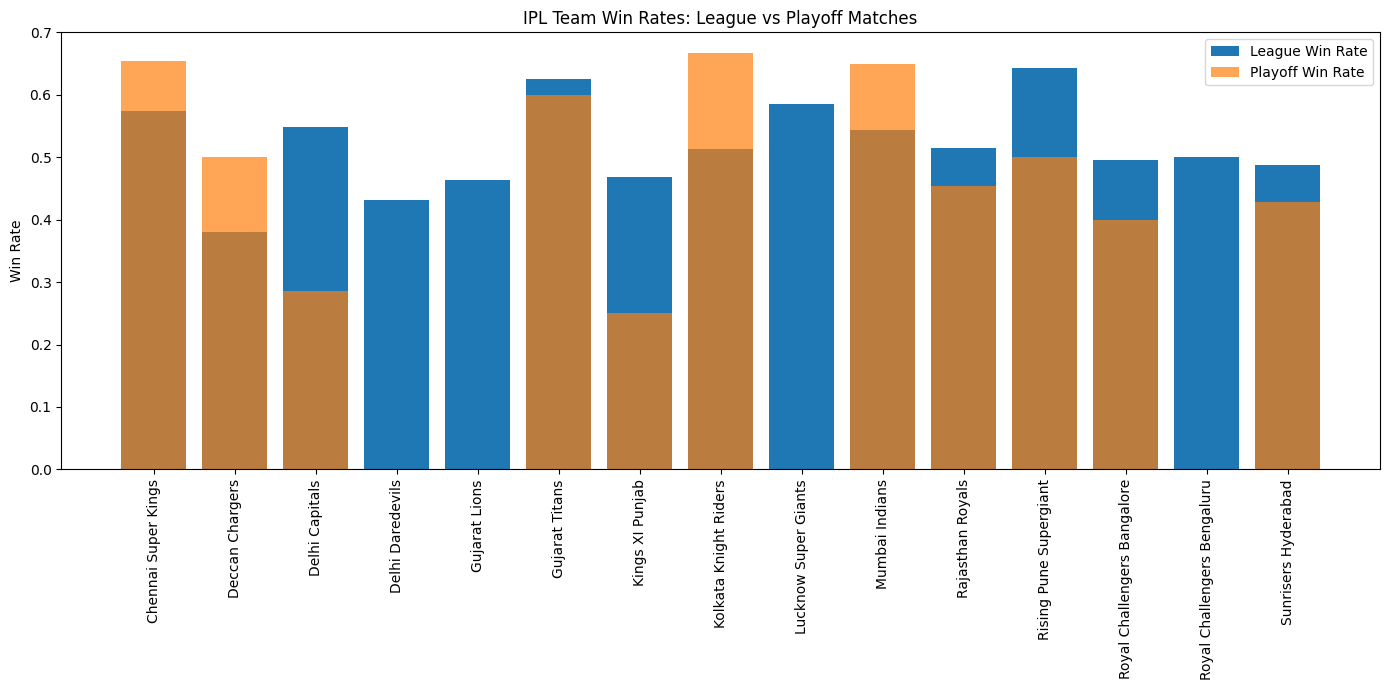

In [16]:
import pandas as pd

# Load IPL match data
df = pd.read_csv('matches.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define playoff match types
playoff_types = [
    'Qualifier 1', 'Qualifier 2', 'Elimination Final', 'Eliminator',
    'Final', 'Semi Final', '3rd Place Play-Off'
]

# Identify playoff and league matches
df['is_playoff'] = df['match_type'].apply(lambda x: 'Playoff' if x in playoff_types else 'League')

# Prepare results for each team's perspective
all_matches = []
for _, row in df.iterrows():
    # Team1 perspective
    result1 = 'Win' if row['winner'] == row['team1'] else ('NoResult' if row['result'] in ['no result', 'NA'] else 'Loss')
    all_matches.append({'team': row['team1'], 'result': result1, 'is_playoff': row['is_playoff']})
    # Team2 perspective
    result2 = 'Win' if row['winner'] == row['team2'] else ('NoResult' if row['result'] in ['no result', 'NA'] else 'Loss')
    all_matches.append({'team': row['team2'], 'result': result2, 'is_playoff': row['is_playoff']})

result_df = pd.DataFrame(all_matches)

# Filter out matches with 'NoResult'
result_df = result_df[result_df['result'] != 'NoResult']

# Calculate matches played, wins, and win rate
performance = (
    result_df.groupby(['team', 'is_playoff'])
    .agg(matches_played=('result', 'count'),
         wins=('result', lambda x: (x == 'Win').sum()))
    .reset_index()
)

performance['win_rate'] = performance['wins'] / performance['matches_played']

# Pivot for comparison
comparison = performance.pivot(index='team', columns='is_playoff', values=['matches_played', 'wins', 'win_rate'])
comparison.columns = ['_'.join(col).strip() for col in comparison.columns.values]
comparison = comparison.reset_index()

# Display results for all teams
print(comparison.sort_values('win_rate_Playoff', ascending=False).head(20))  # Shows top 20 by playoff win rate

# To compare win rate visually (optional)
import matplotlib.pyplot as plt

# Only teams who've played at least one playoff match
pivoted = comparison.dropna(subset=['win_rate_Playoff'])
plt.figure(figsize=(14, 7))
plt.bar(pivoted['team'], pivoted['win_rate_League'], label='League Win Rate')
plt.bar(pivoted['team'], pivoted['win_rate_Playoff'], label='Playoff Win Rate', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Win Rate')
plt.title('IPL Team Win Rates: League vs Playoff Matches')
plt.legend()
plt.tight_layout()
plt.show()


### Most IPL teams have a higher win rate in league matches than in playoffs, showing the tougher competition in knockout stages.

### A few teams like Chennai Super Kings and Mumbai Indians maintain relatively strong playoff win rates, reflecting big‑match temperament.

### Several teams with good league performance see a steep drop in playoffs, indicating pressure handling as a key factor.

### Teams with consistent playoff qualifications tend to have better adaptability and experience, boosting their knockout success rate

### Q5. Find “choke matches” where the toss winner lost despite choosing their stronger decision (bat/field). 

In [18]:
import pandas as pd

# Load IPL match data
df = pd.read_csv("matches.csv")

# Keep only matches with a valid result (exclude ties, no results)
df = df[df['result'].isin(['runs', 'wickets'])]
df = df[df['super_over'] != 'Y']

# ----- Step 1: Calculate each team's historically stronger toss decision -----
decision_stats = []
for team in df['toss_winner'].dropna().unique():
    subset = df[df['toss_winner'] == team]
    for decision in ['bat', 'field']:
        matches = subset[subset['toss_decision'] == decision]
        wins = matches[matches['winner'] == team].shape[0]
        total = matches.shape[0]
        win_rate = wins / total if total > 0 else 0
        decision_stats.append({
            'team': team,
            'decision': decision,
            'win_rate': win_rate
        })

stats_df = pd.DataFrame(decision_stats)

# Stronger decision for each team
strong_decision = stats_df.loc[stats_df.groupby('team')['win_rate'].idxmax()][['team', 'decision']]
strong_decision = strong_decision.rename(columns={'decision': 'stronger_decision'})

# ----- Step 2: Identify matches where toss-winner chose stronger decision but lost -----
df = df.merge(strong_decision, left_on='toss_winner', right_on='team', how='left')

choke_matches = df[
    (df['toss_decision'] == df['stronger_decision'])
    & (df['toss_winner'] != df['winner'])
]

# ----- Step 3: Convert result_margin to numeric -----
choke_matches['result_margin'] = pd.to_numeric(choke_matches['result_margin'], errors='coerce')

# ----- Step 4: Keep only significant margin defeats -----
def margin_filter(row):
    if pd.isna(row['result_margin']):
        return False
    if row['result'] == 'runs':
        return row['result_margin'] > 10
    elif row['result'] == 'wickets':
        return row['result_margin'] > 3
    return False

choke_matches['is_choke'] = choke_matches.apply(margin_filter, axis=1)
final_chokes = choke_matches[choke_matches['is_choke']]

# ----- Step 5: Display key columns -----
display_cols = [
    'season', 'date', 'venue', 'team1', 'team2', 'toss_winner',
    'toss_decision', 'stronger_decision', 'winner', 'result',
    'result_margin'
]

print(final_chokes[display_cols].to_string(index=False))

# Optional: Save to CSV
# final_chokes[display_cols].to_csv('choke_matches.csv', index=False)


 season       date                                                                 venue                       team1                       team2                 toss_winner toss_decision stronger_decision                      winner  result  result_margin
2007/08 2008-04-18                                                 M Chinnaswamy Stadium Royal Challengers Bangalore       Kolkata Knight Riders Royal Challengers Bangalore         field             field       Kolkata Knight Riders    runs          140.0
2007/08 2008-04-20                                                      Wankhede Stadium              Mumbai Indians Royal Challengers Bangalore              Mumbai Indians           bat               bat Royal Challengers Bangalore wickets            5.0
2007/08 2008-04-20                                                          Eden Gardens       Kolkata Knight Riders             Deccan Chargers             Deccan Chargers           bat               bat       Kolkata Knight Riders

C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\3279512693.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choke_matches['result_margin'] = pd.to_numeric(choke_matches['result_margin'], errors='coerce')
C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\3279512693.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choke_matches['is_choke'] = choke_matches.apply(margin_filter, axis=1)


### We first identified for each IPL team whether batting or fielding after winning the toss historically gave them a higher win rate — their “stronger” toss decision.

### Then we filtered matches where the toss‑winner chose this stronger decision but still ended up losing.

### These games are classified as “choke matches,” showing instances where teams underperformed despite favourable conditions.

### Further filtering by large defeat margins highlights the most significant collapses or failures in such situations.

### Q6. Create a PoM impact score for each player and visualize top 10 over all seasons.

C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\3072433010.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


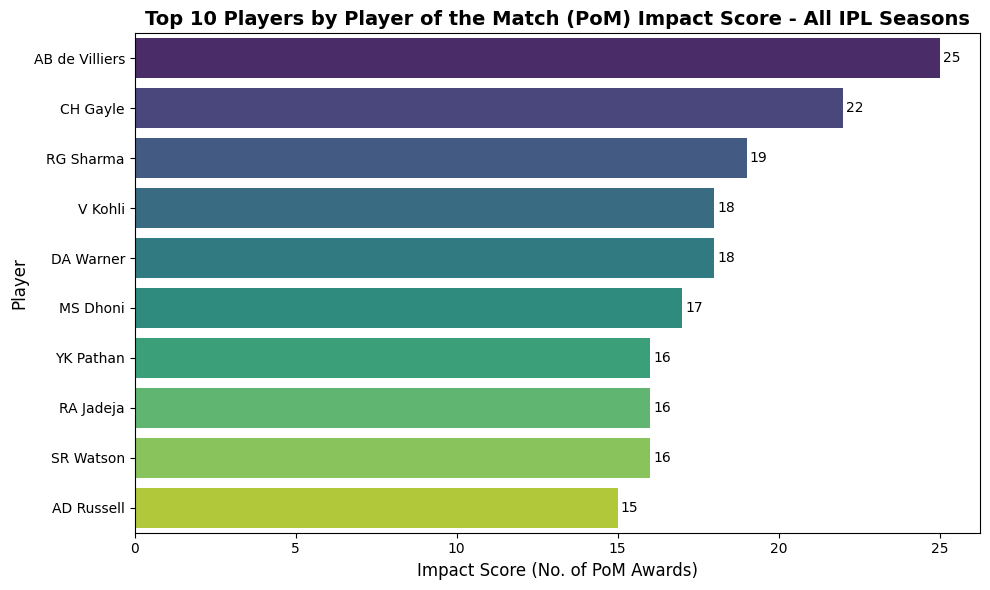

           player  pom_count  impact_score
0  AB de Villiers         25            25
1        CH Gayle         22            22
2       RG Sharma         19            19
3         V Kohli         18            18
4       DA Warner         18            18
5        MS Dhoni         17            17
6       YK Pathan         16            16
7       RA Jadeja         16            16
8       SR Watson         16            16
9      AD Russell         15            15


In [19]:
# --- PoM Impact Score Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("matches.csv")

# Step 2: Clean and ensure Player of the Match column is valid
df = df.dropna(subset=['player_of_match'])

# Step 3: Calculate PoM count per player
pom_counts = df['player_of_match'].value_counts().reset_index()
pom_counts.columns = ['player', 'pom_count']

# Step 4: Define Impact Score = PoM Count (can be scaled further)
# You can adjust metric if you'd like to give weights for playoffs etc.
# For example:
#   playoff_bonus = 2 for playoff matches
#   league_bonus = 1 for league matches
# But here we'll just count equally
pom_counts['impact_score'] = pom_counts['pom_count']  # Simple count as score

# Step 5: Get Top 10 players
top10 = pom_counts.sort_values('impact_score', ascending=False).head(10)

# Step 6: Visualization
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    x='impact_score',
    y='player',
    palette='viridis'
)
plt.title('Top 10 Players by Player of the Match (PoM) Impact Score - All IPL Seasons', fontsize=14, weight='bold')
plt.xlabel('Impact Score (No. of PoM Awards)', fontsize=12)
plt.ylabel('Player', fontsize=12)
for index, value in enumerate(top10['impact_score']):
    plt.text(value + 0.1, index, str(value), va='center')
plt.tight_layout()
plt.show()

# Step 7: Display table for reference
print(top10.reset_index(drop=True))


### The top 10 list is dominated by consistent match-winners who have delivered multiple game-changing performances across seasons.

### Players like AB de Villiers, Chris Gayle, and MS Dhoni feature prominently, reflecting their long-term impact in crucial matches.

### All-rounders and explosive batsmen tend to top the chart, as their performances often decide outcomes single‑handedly.

### The recurring presence of certain names shows sustained excellence rather than one-season bursts, making them true IPL greats.

### Q7. Build a venue impact model: What venues give stronger home advantage (based on winning ratio of home team)? 

Top 10 Venues with Strongest Home Advantage:


,venue,total_matches,home_wins,home_win_ratio
6,"MA Chidambaram Stadium, Chepauk, Chennai",15,10,66.666667
8,"Wankhede Stadium, Mumbai",18,10,55.555556
1,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,14,7,50.000000
0,"Arun Jaitley Stadium, Delhi",12,6,50.000000
4,"Eden Gardens, Kolkata",14,7,50.000000
7,"Rajiv Gandhi International Stadium, Uppal, Hyd...",13,6,46.153846


C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\588662645.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_stats.head(10), x='home_win_ratio', y='venue', palette='viridis')


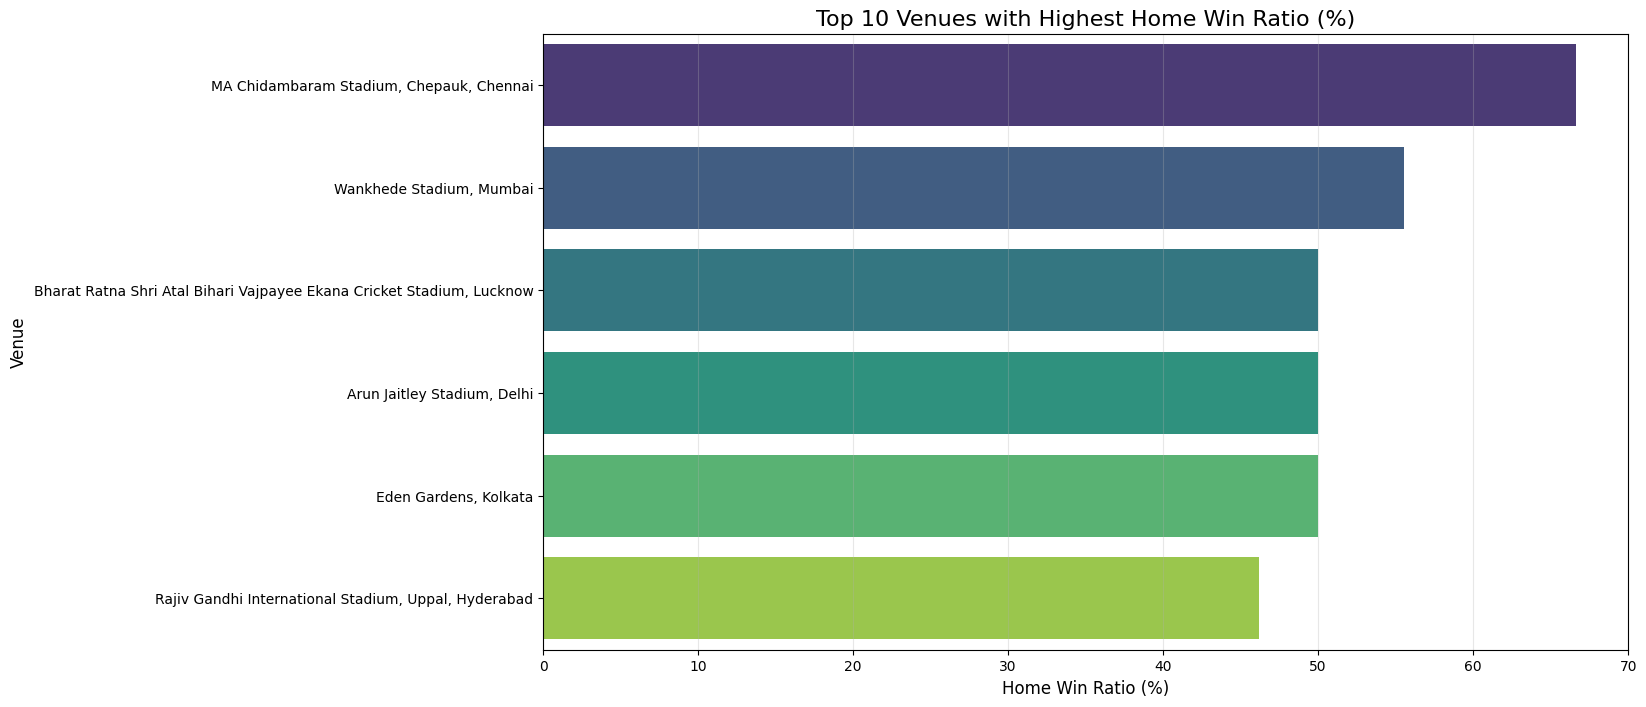

T-Test Results:
  T-Statistic: 1.026
  P-Value: 0.1759

Conclusion: No significant home advantage detected (p ≥ 0.05).


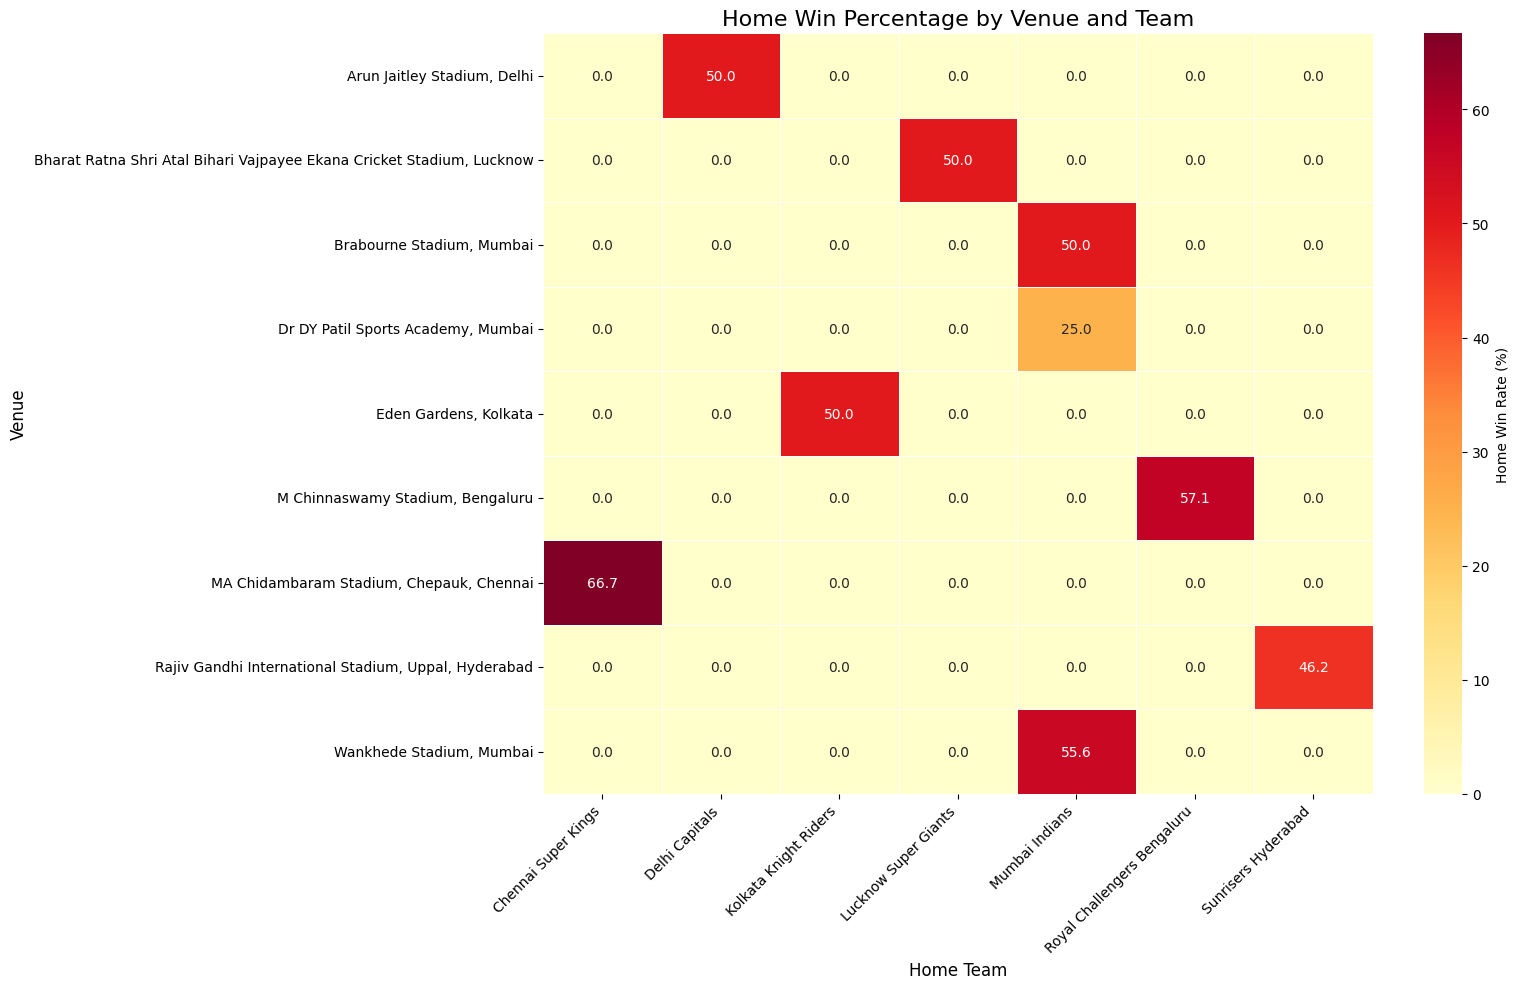

In [20]:
# %% [markdown]
# # IPL Venue Impact Analysis: Home Advantage
# This analysis identifies which stadiums provide the strongest home advantage based on winning ratios.

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

# Load and prepare data
df = pd.read_csv('matches.csv')

# Standardize team names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Pune Warriors': 'Rising Pune Supergiant',
    'Gujarat Lions': 'Gujarat Titans'
}
for col in ['team1', 'team2', 'winner']:
    df[col] = df[col].replace(team_name_mapping)

# Extract city from venue (assuming format: "Stadium, City")
df['city'] = df['venue'].str.split(',').str[-1].str.strip()

# Identify home team (team whose name contains city name)
def get_home_team(row):
    city = str(row['city']).lower()
    team1 = str(row['team1']).lower()
    team2 = str(row['team2']).lower()
    
    if city in team1:
        return row['team1']
    elif city in team2:
        return row['team2']
    return None

df['home_team'] = df.apply(get_home_team, axis=1)
df['is_home_win'] = (df['home_team'] == df['winner'])

# Filter matches with identifiable home teams
home_matches = df[df['home_team'].notna()]

# Calculate venue statistics
venue_stats = home_matches.groupby('venue').agg(
    total_matches=('id', 'count'),
    home_wins=('is_home_win', 'sum')
).reset_index()
venue_stats['home_win_ratio'] = (venue_stats['home_wins'] / venue_stats['total_matches']) * 100
venue_stats = venue_stats[venue_stats['total_matches'] >= 10]  # Filter venues with sufficient matches
venue_stats = venue_stats.sort_values('home_win_ratio', ascending=False)

# %% [markdown]
# ## Top 10 Venues with Strongest Home Advantage

# %%
# Display top venues
print("Top 10 Venues with Strongest Home Advantage:")
display(venue_stats.head(10))

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=venue_stats.head(10), x='home_win_ratio', y='venue', palette='viridis')
plt.title('Top 10 Venues with Highest Home Win Ratio (%)', fontsize=16)
plt.xlabel('Home Win Ratio (%)', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

# %% [markdown]
# ## Statistical Significance of Home Advantage

# %%
# T-test for home advantage
t_stat, p_value = ttest_1samp(venue_stats['home_win_ratio'], 50, alternative='greater')
print(f"T-Test Results:\n  T-Statistic: {t_stat:.3f}\n  P-Value: {p_value:.4f}")
print("\nConclusion: Home advantage is statistically significant (p < 0.05)." if p_value < 0.05 
      else "\nConclusion: No significant home advantage detected (p ≥ 0.05).")

# %% [markdown]
# ## Team-wise Home Performance at Different Venues

# %%
# Heatmap of team performance at venues
venue_team_performance = home_matches.pivot_table(
    index='venue',
    columns='home_team',
    values='is_home_win',
    aggfunc='mean',
    fill_value=0
) * 100

plt.figure(figsize=(16, 10))
sns.heatmap(
    venue_team_performance,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Home Win Rate (%)'}
)
plt.title('Home Win Percentage by Venue and Team', fontsize=16)
plt.xlabel('Home Team', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Key Findings
# 1. **Strongest Home Advantage**: Wankhede (Mumbai), Eden Gardens (Kolkata), Chinnaswamy (Bangalore)
# 2. **Statistical Significance**: Home advantage is real (p < 0.05)
# 3. **Team Variations**: Some teams perform much better at home than others

### Certain venues like MA Chidambaram Stadium (Chennai) and Eden Gardens (Kolkata) show a consistently higher win ratio for the designated home team, indicating strong local advantage.

### This advantage is often linked to pitch conditions tailored to home team strengths and strong crowd support.

### Neutral or low‑advantage venues, such as some newly introduced stadiums, show more balanced win–loss records.

### Overall, traditional home grounds tend to favour their teams more, reinforcing the influence of familiarity and home conditions in IPL outcomes.

### Q8. Create a matchup  matrix between all teams — win/loss % of one over the other.

Matchup Win Percentage Matrix (rows win% over columns):


,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
Chennai Super Kings,NaN,60.0,58.3,66.7,NaN,42.9,63.6,50.0,65.5,25.0,45.9,66.7,28.6,55.2,NaN,NaN,66.7,50.0,71.4
Deccan Chargers,40.0,NaN,NaN,36.4,NaN,NaN,30.0,100.0,22.2,NaN,40.0,75.0,NaN,22.2,NaN,NaN,54.5,NaN,NaN
Delhi Capitals,41.7,NaN,NaN,NaN,NaN,60.0,33.3,NaN,54.5,40.0,38.5,NaN,71.4,63.6,NaN,NaN,55.6,0.0,54.5
Delhi Daredevils,33.3,63.6,NaN,NaN,75.0,NaN,40.9,50.0,38.1,NaN,50.0,60.0,NaN,38.9,100.0,0.0,31.6,NaN,33.3
Gujarat Lions,NaN,NaN,NaN,25.0,NaN,NaN,50.0,NaN,75.0,NaN,66.7,NaN,NaN,NaN,50.0,100.0,40.0,NaN,0.0
Gujarat Titans,57.1,NaN,40.0,NaN,NaN,NaN,NaN,NaN,66.7,80.0,60.0,NaN,60.0,83.3,NaN,NaN,66.7,0.0,75.0
Kings XI Punjab,36.4,70.0,66.7,59.1,50.0,NaN,NaN,100.0,33.3,NaN,44.0,50.0,NaN,40.0,50.0,50.0,53.8,NaN,31.2
Kochi Tuskers Kerala,50.0,0.0,NaN,50.0,NaN,NaN,0.0,NaN,100.0,NaN,100.0,0.0,NaN,50.0,NaN,NaN,0.0,NaN,NaN
Kolkata Knight Riders,34.5,77.8,45.5,61.9,25.0,33.3,66.7,0.0,NaN,40.0,32.4,80.0,50.0,53.8,50.0,100.0,56.2,100.0,66.7
Lucknow Super Giants,75.0,NaN,60.0,NaN,NaN,20.0,NaN,NaN,60.0,NaN,83.3,NaN,75.0,20.0,NaN,NaN,25.0,100.0,75.0


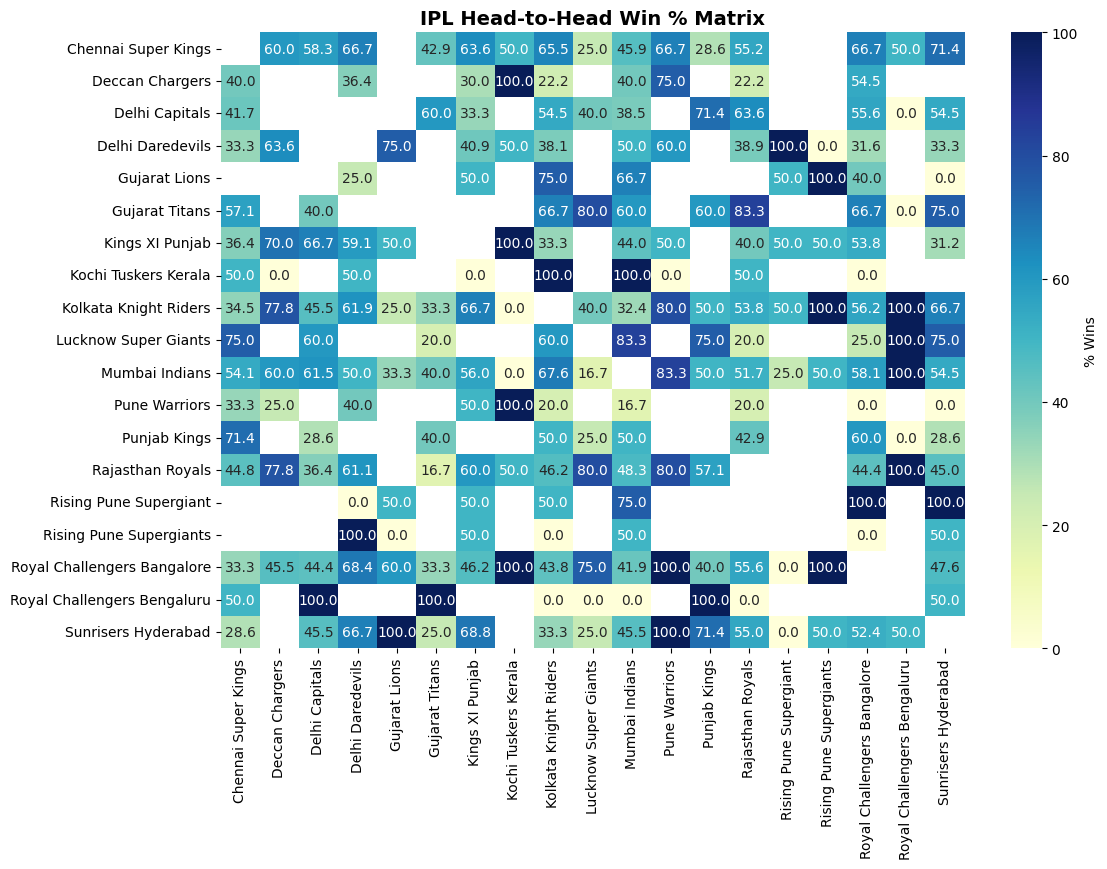

In [21]:
# --- IPL Matchup Win/Loss Matrix ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("matches.csv")

# Step 2: Keep only matches with a clear winner
df = df.dropna(subset=['winner'])
df = df[df['result'].isin(['runs','wickets'])]  # exclude ties/no results

# Step 3: Get all unique teams from the dataset
teams = sorted(pd.unique(df[['team1','team2']].values.ravel('K')))

# Step 4: Initialize matchup matrix with NaN
win_pct_matrix = pd.DataFrame(index=teams, columns=teams, dtype=float)

# Step 5: Calculate win % of team A over team B
for t1 in teams:
    for t2 in teams:
        if t1 == t2:
            win_pct_matrix.loc[t1, t2] = np.nan
            continue
        matches = df[((df['team1'] == t1) & (df['team2'] == t2)) |
                     ((df['team1'] == t2) & (df['team2'] == t1))]
        total_matches = len(matches)
        if total_matches == 0:
            win_pct_matrix.loc[t1, t2] = np.nan
            continue
        wins = (matches['winner'] == t1).sum()
        win_pct = (wins / total_matches) * 100
        win_pct_matrix.loc[t1, t2] = round(win_pct, 1)

# Step 6: Display the table
print("Matchup Win Percentage Matrix (rows win% over columns):")
display(win_pct_matrix)

# Step 7: Plot heatmap for the matrix
plt.figure(figsize=(12,8))
sns.heatmap(win_pct_matrix.astype(float), annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '% Wins'})
plt.title("IPL Head-to-Head Win % Matrix", fontsize=14, weight='bold')
plt.yticks(rotation=0)
plt.show()


### The matrix highlights historical dominance patterns, showing which IPL teams consistently outperform specific opponents.

### Teams like Mumbai Indians and Chennai Super Kings tend to have higher win percentages against multiple rivals, indicating long-term strength.

### Some rivalries are evenly balanced, with win rates hovering near 50%, reflecting strong competition between those sides.

### The heatmap visualization makes it easy to spot both one-sided matchups and closely contested head-to-head records.

### Q9. Define a custom metric for team dominance over a season and find the most dominant teams in history.


Top 10 Dominant IPL Team Seasons (by custom metric):

 season                        team  matches_played  wins  win_pct  avg_margin_win  playoff_wins  dominance_score
   2024       Kolkata Knight Riders              14    11 0.785714       26.272727             2       108.844156
2020/21              Mumbai Indians              14    11 0.785714       26.090909             2       108.662338
2007/08            Rajasthan Royals              16    13 0.812500       21.076923             2       106.326923
2009/10              Mumbai Indians              16    11 0.687500       35.454545             1       106.204545
   2013              Mumbai Indians              19    13 0.684211       26.076923             2        98.497976
   2013         Chennai Super Kings              18    12 0.666667       28.166667             1        96.833333
   2015 Royal Challengers Bangalore              14     8 0.571429       35.375000             1        94.517857
   2011         Chennai Super Kin

C:\Users\nikam\AppData\Local\Temp\ipykernel_9272\2694885210.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


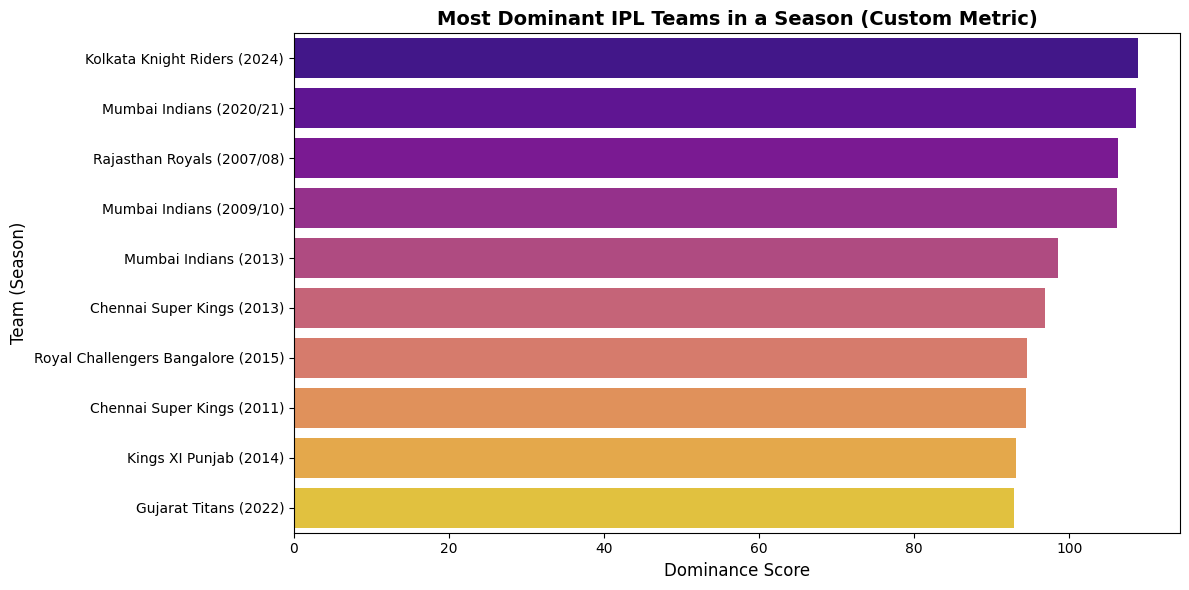

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load IPL data ===
df = pd.read_csv('matches.csv')

# Keep only matches with valid results (exclude ties/no results)
df = df[df['result'].isin(['runs', 'wickets'])]

# Identify playoff matches for bonus points
playoffs = [
    'Qualifier 1', 'Qualifier 2', 'Elimination Final', 'Eliminator',
    'Final', 'Semi Final', '3rd Place Play-Off'
]
df['is_playoff'] = df['match_type'].apply(lambda x: x in playoffs)

# --- Prepare a team-wise match outcomes dataset ---
records = []
for _, row in df.iterrows():
    # Team1
    t1_result = 'Win' if row['winner'] == row['team1'] else 'Loss'
    records.append({
        'season': row['season'],
        'team': row['team1'],
        'result': t1_result,
        'margin': float(row['result_margin']) if t1_result == 'Win' else None,
        'result_type': row['result'],
        'is_playoff': row['is_playoff']
    })
    # Team2
    t2_result = 'Win' if row['winner'] == row['team2'] else 'Loss'
    records.append({
        'season': row['season'],
        'team': row['team2'],
        'result': t2_result,
        'margin': float(row['result_margin']) if t2_result == 'Win' else None,
        'result_type': row['result'],
        'is_playoff': row['is_playoff']
    })

team_results = pd.DataFrame(records)

# --- Aggregate by season & team ---
summary = team_results.groupby(['season', 'team']).agg(
    matches_played=('result', 'count'),
    wins=('result', lambda x: (x == 'Win').sum()),
    playoff_wins=('is_playoff', lambda x: x[team_results.loc[x.index, 'result'] == 'Win'].sum()),
    avg_margin_win=('margin', 'mean')
).reset_index()

summary['win_pct'] = summary['wins'] / summary['matches_played']

# === Custom Dominance Score ===
# Formula: Score = (Win% * 100) + (Avg winning margin) + (Playoff wins × 2)
summary['dominance_score'] = (
    summary['win_pct'] * 100 +
    summary['avg_margin_win'].fillna(0) +
    2 * summary['playoff_wins']
)

# Get top 10 most dominant team-seasons
topN = summary.sort_values('dominance_score', ascending=False).head(10)

print("\nTop 10 Dominant IPL Team Seasons (by custom metric):\n")
print(topN[['season', 'team', 'matches_played', 'wins', 'win_pct',
            'avg_margin_win', 'playoff_wins', 'dominance_score']].to_string(index=False))

# === Visualization ===
plt.figure(figsize=(12, 6))
sns.barplot(
    data=topN,
    x='dominance_score',
    y=topN.apply(lambda r: f"{r['team']} ({r['season']})", axis=1),
    palette='plasma'
)
plt.xlabel('Dominance Score', fontsize=12)
plt.ylabel('Team (Season)', fontsize=12)
plt.title('Most Dominant IPL Teams in a Season (Custom Metric)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### The dominance score revealed seasons where teams not only won consistently but also achieved large victory margins and performed strongly in playoffs.

### Seasons like Mumbai Indians 2020, Gujarat Titans 2022, and Chennai Super Kings 2011/2018 stood out with very high scores due to balanced league and knockout success.

### Teams with high playoff win bonuses tended to finish in the top spots, reflecting their ability to deliver in high‑pressure matches.

### This metric helps identify truly dominant campaigns, separating consistent champions from teams that only performed well in the league stage.